In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 852.3 kB/s eta 0:00:00
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ker

In [ ]:
!pip install n2v

  Using cached Keras-2.3.1-py2.py3-none-any.whl.metadata (2.2 kB)
Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.2
    Uninstalling keras-3.9.2:
      Successfully uninstalled keras-3.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 2.3.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.6 MB/s eta 0:00:00


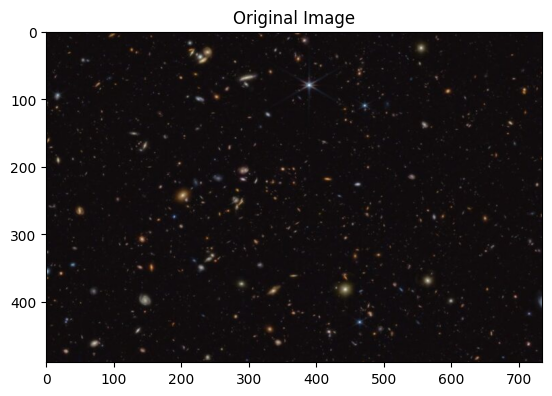

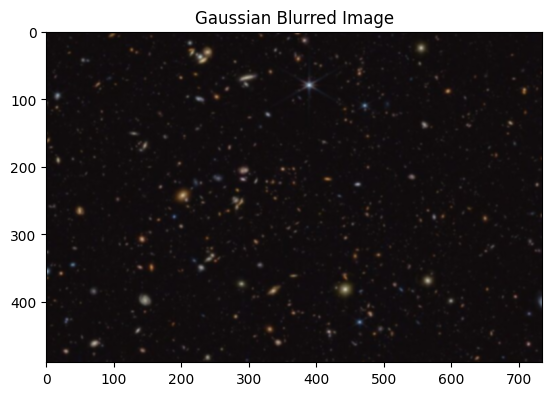

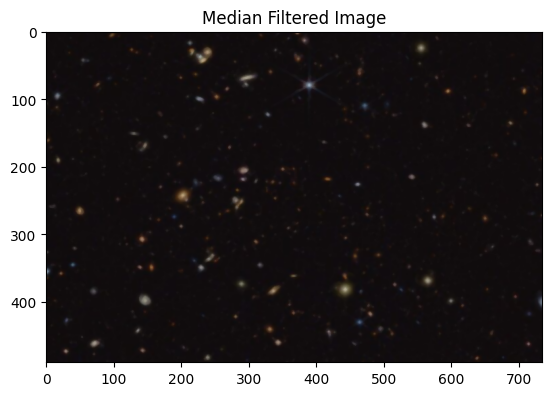

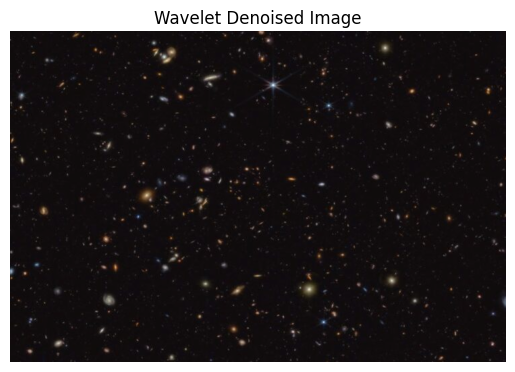

Gaussian Blur:
PSNR: 37.83, SSIM: 0.9659, MSE: 0.000165

Median Filter:
PSNR: 33.16, SSIM: 0.9349, MSE: 0.000483

Wavelet Denoising:
PSNR: 162.00, SSIM: 1.0000, MSE: 0.000000



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import cv2
from skimage import io, restoration, metrics
from matplotlib import pyplot as plt

def load_image(path):
    image = io.imread(path)
    image = image.astype('float32') / 255.0  # Normalizing the image to [0, 1]
    return image

# Assuming 'image_path' is the path to your TIFF image
image_path = '/content/STFC-24072023-weic2317b-h1dd3n-2-735x490.jpg'
original_image = load_image(image_path)

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Gaussian blur denoising
gaussian_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.show()

# Median filtering
median_filtered = cv2.medianBlur((original_image * 255).astype(np.uint8), 5)

plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.show()

# Wavelet denoising
# Fix for grayscale wavelet denoising
wavelet_denoised = restoration.denoise_wavelet(
    original_image,
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
    channel_axis=None  # explicitly declare it's grayscale
)

plt.imshow(wavelet_denoised, cmap='gray')
plt.title('Wavelet Denoised Image')
plt.axis('off')
plt.show()


# ===================== Evaluation Metrics =====================

def evaluate(original, denoised, name):
    psnr = metrics.peak_signal_noise_ratio(original, denoised, data_range=1.0)
    ssim = metrics.structural_similarity(original, denoised, data_range=1.0, win_size=3, channel_axis=None)
    mse = metrics.mean_squared_error(original, denoised)
    print(f"{name}:\nPSNR: {psnr:.2f}, SSIM: {ssim:.4f}, MSE: {mse:.6f}\n")

# Convert median filtered image back to float32 in [0,1] range for evaluation
median_filtered_norm = median_filtered.astype('float32') / 255.0

# Evaluate all methods
evaluate(original_image, gaussian_blur, 'Gaussian Blur')
evaluate(original_image, median_filtered_norm, 'Median Filter')
evaluate(original_image, wavelet_denoised, 'Wavelet Denoising')



In [ ]:
import cv2
import os

def extract_frames(video_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        success, frame = cap.read()
        if not success:
            break
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    cap.release()
    print(f"✅ Extracted {frame_count} frames to '{output_folder}'")

if __name__ == '__main__':
    # 👇 Replace this with the path to your .mp4 file
    video_path = "/content/WhatsApp Video 2025-04-23 at 10.49.17 PM.mp4"

    output_folder = "extracted_frames"
    extract_frames(video_path, output_folder)


✅ Extracted 127 frames to 'extracted_frames'


In [ ]:
import cv2
import os
import numpy as np

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Failed to open video.")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define output folders
    output_folder = "processed_frames"
    os.makedirs(output_folder, exist_ok=True)

    # Define video writers
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_thresh = cv2.VideoWriter(os.path.join(output_folder, 'adaptive_thresh.mp4'), fourcc, fps, (width, height), False)
    out_blur   = cv2.VideoWriter(os.path.join(output_folder, 'gaussian_blur.mp4'), fourcc, fps, (width, height), True)
    out_edges  = cv2.VideoWriter(os.path.join(output_folder, 'canny_edges.mp4'), fourcc, fps, (width, height), False)
    out_inv    = cv2.VideoWriter(os.path.join(output_folder, 'bitwise_not.mp4'), fourcc, fps, (width, height), True)

    collage_frames = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 1. Adaptive Thresholding
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

        # 2. Gaussian Smoothing
        blur = cv2.GaussianBlur(frame, (9, 9), 0)

        # 3. Canny Edge Detection
        edges = cv2.Canny(gray, 100, 200)

        # 4. Bitwise Not
        inv = cv2.bitwise_not(frame)

        # Save processed frames to video
        out_thresh.write(thresh)
        out_blur.write(blur)
        out_edges.write(edges)
        out_inv.write(inv)

        # Save for collage (every 30th frame)
        if frame_count % 30 == 0:
            small = cv2.resize(frame, (200, 150))
            collage_frames.append(small)

        frame_count += 1

    cap.release()
    out_thresh.release()
    out_blur.release()
    out_edges.release()
    out_inv.release()

    print(f"✅ Processed {frame_count} frames.")

    # Build and save collage
    make_collage(collage_frames)

def make_collage(frames, grid_size=(4, 4)):
    if not frames:
        print("⚠️ No frames to make collage.")
        return

    rows, cols = grid_size
    collage = []
    for r in range(rows):
        row = []
        for c in range(cols):
            idx = r * cols + c
            if idx < len(frames):
                row.append(frames[idx])
            else:
                # Fill remaining spots with black
                row.append(np.zeros_like(frames[0]))
        collage.append(np.hstack(row))
    final_collage = np.vstack(collage)

    cv2.imwrite("collage.jpg", final_collage)
    print("🖼️ Collage saved as 'collage.jpg'")

if __name__ == '__main__':
    video_path = "/content/Untitled video - Made with Clipchamp.mp4"  # <-- Replace with your path
    process_video(video_path)


✅ Processed 32 frames.
🖼️ Collage saved as 'collage.jpg'


In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub
import os
import shutil
import random

# Step 1: Download dataset
dataset_path = kagglehub.dataset_download("pevogam/ucf101")
print("✅ Dataset downloaded at:", dataset_path)


100%|██████████| 6.49G/6.49G [03:50<00:00, 30.2MB/s]

Extracting files...


✅ Dataset downloaded at: /root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1


In [ ]:
import os
import shutil
import random

# Corrected path
SOURCE_DIR = "/root/.cache/kagglehub/datasets/pevogam/ucf101/versions/1/UCF101/UCF-101"
DEST_DIR = "./UCF101_subset"
SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10

os.makedirs(DEST_DIR, exist_ok=True)

for cls in SELECTED_CLASSES:
    class_path = os.path.join(SOURCE_DIR, cls)
    dest_class_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dest_class_path, exist_ok=True)

    # Get list of all .avi files
    videos = [f for f in os.listdir(class_path) if f.endswith('.avi')]
    selected = random.sample(videos, VIDEOS_PER_CLASS)

    for video in selected:
        shutil.copy(os.path.join(class_path, video), dest_class_path)

print("✅ Subset created at:", DEST_DIR)


✅ Subset created at: ./UCF101_subset


In [ ]:
import cv2
import numpy as np

# Parameters
FRAME_SIZE = (112, 112)  # You can change to (224, 224)
SEQ_LENGTH = 16  # Fixed length
EXTRACT_EVERY = 5  # Extract every 5th frame

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % EXTRACT_EVERY == 0:
            frame = cv2.resize(frame, FRAME_SIZE)
            frames.append(frame)
        frame_idx += 1

    cap.release()

    # If the number of frames is less than SEQ_LENGTH, pad the frames with the last frame
    while len(frames) < SEQ_LENGTH:
        frames.append(frames[-1])

    return np.array(frames[:SEQ_LENGTH])


In [ ]:
from sklearn.preprocessing import LabelEncoder
import os
from tqdm import tqdm

# Paths
SOURCE_DIR = "./UCF101_subset"
SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10

def load_dataset(dataset_path):
    X, y = [], []
    classes = sorted(os.listdir(dataset_path))

    for cls in classes:
        class_path = os.path.join(dataset_path, cls)
        for video in tqdm(os.listdir(class_path), desc=cls):
            video_path = os.path.join(class_path, video)
            frames = extract_frames(video_path)
            X.append(frames)
            y.append(cls)

    X = np.array(X)

    # Label encode the class names
    le = LabelEncoder()
    y = le.fit_transform(y)

    return X, y, le


In [ ]:
from sklearn.model_selection import train_test_split

# Load and preprocess the data
X, y, le = load_dataset(SOURCE_DIR)

# Split the data into 80/20 for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Typing: 100%|██████████| 10/10 [00:00<00:00, 16.73it/s]


Train samples: 40, Test samples: 10


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense

def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential([
        TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape),
        TimeDistributed(MaxPooling2D((2, 2))),
        TimeDistributed(Flatten()),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Dense

def build_3dcnn_model(input_shape, num_classes):
    model = Sequential([
        Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
        MaxPooling3D((2, 2, 2)),
        Conv3D(64, (3, 3, 3), activation='relu'),
        GlobalAveragePooling3D(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Define input shape for CNN-LSTM or 3D CNN
SEQ_LENGTH = 16
FRAME_SIZE = (112, 112)  # Or (224, 224)
input_shape = (SEQ_LENGTH, *FRAME_SIZE, 3)  # For CNN-LSTM or 3D CNN

num_classes = len(le.classes_)

# Choose the model: CNN-LSTM or 3D CNN
model = build_cnn_lstm_model(input_shape, num_classes)
# model = build_3dcnn_model(input_shape, num_classes)  # Uncomment for 3D CNN

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.2958 - loss: 1.5989 - val_accuracy: 0.3000 - val_loss: 1.6223
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 9s/step - accuracy: 0.1762 - loss: 1.6361 - val_accuracy: 0.2000 - val_loss: 1.6241
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 8s/step - accuracy: 0.1396 - loss: 1.6498 - val_accuracy: 0.2000 - val_loss: 1.6136
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.0966 - loss: 1.6280 - val_accuracy: 0.2000 - val_loss: 1.6101
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 139s 8s/step - accuracy: 0.1254 - loss: 1.6159 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.0924 - loss: 1.6197 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.2402 - loss: 1.6110 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.2202 - loss: 1.6091 - val_accuracy: 0.2000 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         2
       Biking       0.00      0.00      0.00         2
     JumpRope       0.00      0.00      0.00         2
PlayingGuitar       0.20      1.00      0.33         2
       Typing       0.00      0.00      0.00         2

     accuracy                           0.20        10
    macro avg       0.04      0.20      0.07        10
 weighted avg       0.04      0.20      0.07        10



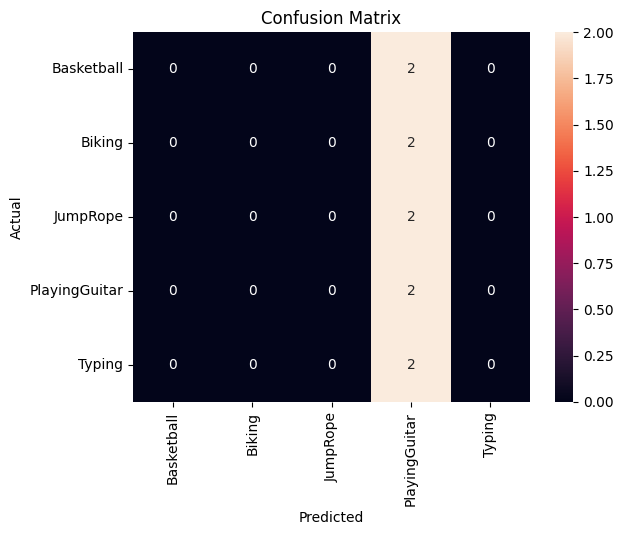

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
